**ANS:1** 1. What is hypothesis testing in statistics?
Hypothesis testing is a method to evaluate a claim about a population parameter using sample data. It involves comparing observed results with expected outcomes under a null hypothesis to determine statistical significance.

**ANS:2** Null Hypothesis (H₀): Assumes no effect or no difference (e.g., "The drug has no effect").

Alternative Hypothesis (H₁ or Ha): Represents the effect or difference we want to test (e.g., "The drug is effective").


**ANS:3** The significance level (α) (e.g., 0.05) is the threshold for rejecting H₀. It defines the probability of a Type I error (false positive).

**ANS:4** The P-value is the probability of observing the data (or more extreme) if H₀ is true. A low P-value (< α) suggests evidence against H₀.

**ANS:5** P < α: Reject H₀ (statistically significant).

P ≥ α: Fail to reject H₀ (not significant).

**ANS:6** Type I (α): False positive (rejecting H₀ when it’s true).

Type II (β): False negative (failing to reject H₀ when it’s false)

**ANS:7** One-tailed: Tests for an effect in one direction (e.g., "greater than").

Two-tailed: Tests for any difference (e.g., "not equal to").

**ANS:8** A Z-test compares sample means to a population mean when the population variance is known (or n is large). Used for proportions or large samples (n > 30).

**ANS:9** Z = (X̄ − μ) / (σ / √n)

Breaking it down word-by-word:
X̄ (Sample Mean): The average value of your sample data.

μ (Population Mean): The average value you’re comparing against (hypothesized or known).

σ (Population Standard Deviation): How spread out the population data is.

√n (Square Root of Sample Size): Adjusts for the fact that larger samples give more reliable estimates.

It measures how many standard deviations a sample mean is from the population mean.

**ANS:10** The T-distribution is used for small samples (n < 30) or when the population variance is unknown. It has heavier tails than the normal distribution.

**ANS:11** Z-test: Known population variance or large sample.

T-test: Unknown variance and small sample.

**ANS:12** Compares means of two groups. Types:

One-sample: Tests if a sample mean differs from a known mean.

Independent samples: Compares two unrelated groups.

Paired: Compares related measurements (e.g., pre-test/post-test).

**ANS:13** Both compare means, but the T-test adjusts for small samples/unknown variance using degrees of freedom.

**ANS:14** A range of values likely to contain the population parameter (e.g., 95% CI means we’re 95% confident the true value lies within the interval).

**ANS:15** MOE = Critical value × Standard error. It defines the width of the CI; a smaller MOE increases precision.

**ANS:16** Updates prior probabilities with new data to get posterior probabilities. Key in Bayesian statistics for decision-making under uncertainty.

**ANS:17** A skewed distribution used for categorical data tests (e.g., goodness-of-fit, independence).

**ANS:18** Tests if observed frequencies match expected frequencies (e.g., "Is a die fair?").

**ANS:19** Used in ANOVA and regression to compare variances (ratio of two Chi-square variables).

**ANS:20** ANOVA compares means of ≥3 groups. Assumptions:

Normality, homogeneity of variance, independent samples.

**ANS:21** One-way: 1 independent variable.

Two-way: 2 independent variables (with interaction effects).

Repeated measures: Same subjects under different conditions

**ANS:22** Compares variances (e.g., in ANOVA, it tests if group means are equal by analyzing variance ratios)

**PRACTICALS**

In [1]:
#ANS:1
import numpy as np
from scipy.stats import norm

# Simulate data
np.random.seed(42)
sample = np.random.normal(loc=75, scale=10, size=30)  # Sample mean ~75
pop_mean = 70  # Hypothesized population mean
pop_std = 10   # Known population std

# Z-test
sample_mean = np.mean(sample)
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(len(sample)))
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

print(f"Z-score: {z_score:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Sample mean differs significantly.")
else:
    print("Fail to reject H₀.")

Z-score: 1.71, P-value: 0.0876
Fail to reject H₀.


In [2]:
#ANS:2
from scipy.stats import ttest_1samp

sample = np.random.normal(loc=5, scale=2, size=100)
pop_mean = 4.5
t_stat, p_value = ttest_1samp(sample, pop_mean)
print(f"P-value: {p_value:.4f}")

P-value: 0.0241


In [3]:
#ANS:3
def z_test(sample, pop_mean, pop_std):
    z = (np.mean(sample) - pop_mean) / (pop_std / np.sqrt(len(sample)))
    p = 2 * norm.sf(abs(z))
    return z, p

z, p = z_test(sample, pop_mean=70, pop_std=10)

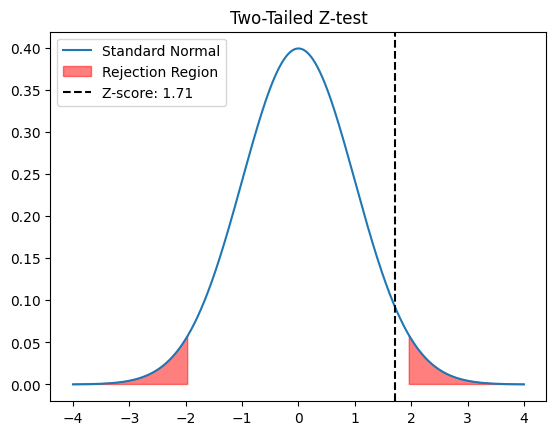

In [4]:
#ANS:4
import matplotlib.pyplot as plt

z_critical = norm.ppf(0.975)  # Critical value for α=0.05
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x), label='Standard Normal')
plt.fill_between(x, norm.pdf(x), where=(abs(x) > z_critical), color='red', alpha=0.5, label='Rejection Region')
plt.axvline(z_score, color='black', linestyle='--', label=f'Z-score: {z_score:.2f}')
plt.legend()
plt.title("Two-Tailed Z-test")
plt.show()

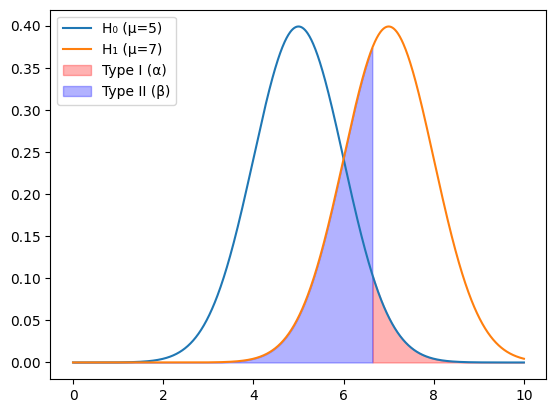

In [5]:
#ANS:5
def plot_errors():
    x = np.linspace(0, 10, 1000)
    h0 = norm.pdf(x, loc=5, scale=1)
    h1 = norm.pdf(x, loc=7, scale=1)
    plt.plot(x, h0, label='H₀ (μ=5)')
    plt.plot(x, h1, label='H₁ (μ=7)')
    plt.fill_between(x, h0, where=(x > norm.ppf(0.95, loc=5, scale=1)), color='red', alpha=0.3, label='Type I (α)')
    plt.fill_between(x, h1, where=(x < norm.ppf(0.95, loc=5, scale=1)), color='blue', alpha=0.3, label='Type II (β)')
    plt.legend()
    plt.show()

plot_errors()

In [6]:
#ANS:6
from scipy.stats import ttest_ind

group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 10, 30)
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: -2.93, P-value: 0.0049


In [7]:
#ANS:7
from scipy.stats import ttest_rel

pre = np.random.normal(50, 10, 30)
post = pre + np.random.normal(5, 2, 30)
t_stat, p_value = ttest_rel(pre, post)
print(f"Paired T-test P-value: {p_value:.4f}")

Paired T-test P-value: 0.0000


In [8]:
#ANS:8
small_sample = np.random.normal(50, 10, 20)
z_stat, _ = z_test(small_sample, pop_mean=50, pop_std=10)
t_stat, _ = ttest_1samp(small_sample, popmean=50)
print(f"Z-score: {z_stat:.2f}, T-statistic: {t_stat:.2f}")

Z-score: -0.96, T-statistic: -0.74


In [9]:
#ANS:9
from scipy.stats import sem, t

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = sem(data)
    margin = se * t.ppf((1 + confidence) / 2, len(data) - 1)
    return (mean - margin, mean + margin)

ci = confidence_interval(sample)
print(f"95% CI: ({ci[0]:.2f}, {ci[1]:.2f})")

95% CI: (4.56, 5.32)


In [10]:
#ANS:10
def margin_of_error(data, confidence=0.95):
    se = sem(data)
    return se * t.ppf((1 + confidence) / 2, len(data) - 1)

moe = margin_of_error(sample)
print(f"Margin of Error: ±{moe:.2f}")

Margin of Error: ±0.38


In [11]:
#ANS:11
def bayes_theorem(prior, likelihood, evidence):
    return (prior * likelihood) / evidence

prior = 0.01  # P(Disease)
likelihood = 0.95  # P(Test+ | Disease)
evidence = 0.05  # P(Test+)
posterior = bayes_theorem(prior, likelihood, evidence)
print(f"Posterior Probability: {posterior:.4f}")

Posterior Probability: 0.1900


In [12]:
#ANS:12
from scipy.stats import chi2_contingency

observed = np.array([[30, 10], [20, 40]])
chi2, p, _, _ = chi2_contingency(observed)
print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p:.4f}")

Chi2 Statistic: 15.04, P-value: 0.0001


In [13]:
#ANS:13
expected = chi2_contingency(observed)[3]
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


In [14]:
#ANS:14
from scipy.stats import chisquare

observed = np.array([25, 15, 10])
expected = np.array([20, 20, 10])
chi2, p = chisquare(observed, expected)
print(f"Chi2: {chi2:.2f}, P-value: {p:.4f}")

Chi2: 2.50, P-value: 0.2865


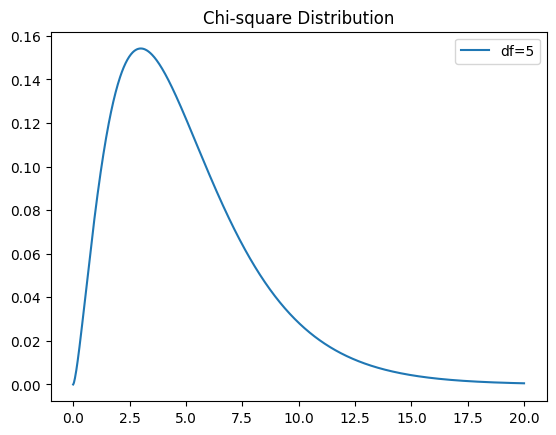

In [16]:
#ANS:15
from scipy.stats import chi2 # Make sure to import the chi2 function from scipy.stats
import numpy as np
import matplotlib.pyplot as plt

df = 5
x = np.linspace(0, 20, 1000)
plt.plot(x, chi2.pdf(x, df), label=f'df={df}') # Now chi2 refers to the function from scipy.stats
plt.title("Chi-square Distribution")
plt.legend()
plt.show()

In [17]:
#ANS:16
from scipy.stats import f_oneway

group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(50, 15, 30)
f_stat, p_value = f_oneway(group1, group2)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

F-statistic: 1.36, P-value: 0.2490


In [31]:
#ANS:17
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create sample data with 3 groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)
group3 = np.random.normal(loc=60, scale=10, size=30)

# Combine into a DataFrame
data = pd.DataFrame({
    'values': np.concatenate([group1, group2, group3]),
    'group': ['Group1']*30 + ['Group2']*30 + ['Group3']*30
})

# Perform one-way ANOVA
model = ols('values ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Interpretation
f_statistic = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]

print("\nInterpretation:")
if p_value < 0.05:
    print(f"With a p-value of {p_value:.4f} (< 0.05), we reject the null hypothesis.")
    print("There is a statistically significant difference between the means of at least two groups.")
else:
    print(f"With a p-value of {p_value:.4f} (≥ 0.05), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the group means.")

ANOVA Results:
               sum_sq    df          F    PR(>F)
C(group)  2165.964313   2.0  12.209526  0.000021
Residual  7716.880356  87.0        NaN       NaN

Interpretation:
With a p-value of 0.0000 (< 0.05), we reject the null hypothesis.
There is a statistically significant difference between the means of at least two groups.


<ipython-input-31-10bfd74ddf2e>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_table['F'][0]
<ipython-input-31-10bfd74ddf2e>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


<ipython-input-32-e813d58f5cbe>:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='group', y='values', data=data, capsize=0.1, errwidth=1)


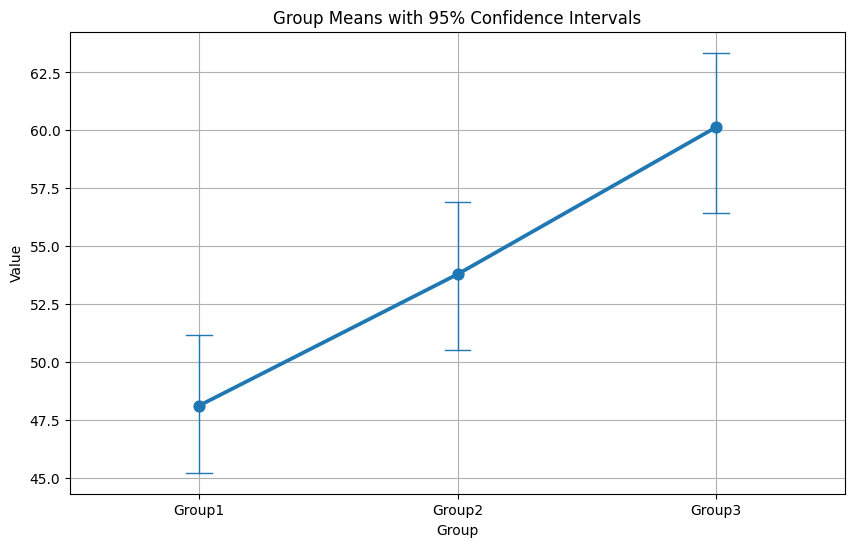


ANOVA Results:
               sum_sq    df          F    PR(>F)
C(group)  2165.964313   2.0  12.209526  0.000021
Residual  7716.880356  87.0        NaN       NaN


In [32]:
#ANS:18
import matplotlib.pyplot as plt
import seaborn as sns

# Perform ANOVA (same as above)
model = ols('values ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Plot the results
plt.figure(figsize=(10, 6))
sns.pointplot(x='group', y='values', data=data, capsize=0.1, errwidth=1)
plt.title('Group Means with 95% Confidence Intervals')
plt.xlabel('Group')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print("\nANOVA Results:")
print(anova_table)

In [33]:
#ANS:19
def check_anova_assumptions(data, group_col, value_col):
    """
    Check ANOVA assumptions: normality, independence, and equal variance.

    Parameters:
    data (DataFrame): Input data
    group_col (str): Column name for groups
    value_col (str): Column name for values
    """
    groups = data[group_col].unique()

    print("=== Normality Check (Shapiro-Wilk test) ===")
    for group in groups:
        group_data = data[data[group_col] == group][value_col]
        stat, p = stats.shapiro(group_data)
        print(f"{group}: p-value = {p:.4f}",
              "(Normal)" if p > 0.05 else "(Not normal)")

    print("\n=== Equal Variance Check (Levene's test) ===")
    group_data = [data[data[group_col] == g][value_col] for g in groups]
    stat, p = stats.levene(*group_data)
    print(f"Levene's test p-value = {p:.4f}",
          "(Equal variances)" if p > 0.05 else "(Unequal variances)")

    print("\n=== Independence Check ===")
    print("This must be assessed based on experimental design.")
    print("Ensure observations are independent between groups and within each group.")

# Example usage
check_anova_assumptions(data, 'group', 'values')

=== Normality Check (Shapiro-Wilk test) ===
Group1: p-value = 0.6868 (Normal)
Group2: p-value = 0.9130 (Normal)
Group3: p-value = 0.3654 (Normal)

=== Equal Variance Check (Levene's test) ===
Levene's test p-value = 0.8627 (Equal variances)

=== Independence Check ===
This must be assessed based on experimental design.
Ensure observations are independent between groups and within each group.


Two-way ANOVA Results:
                            sum_sq    df          F    PR(>F)
C(Factor1)              951.078042   1.0  10.092933  0.002152
C(Factor2)             1806.172987   1.0  19.167283  0.000038
C(Factor1):C(Factor2)     4.047334   1.0   0.042951  0.836372
Residual               7161.638081  76.0        NaN       NaN


<ipython-input-34-639da060e1e8>:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='Factor1', y='value', hue='Factor2', data=data,


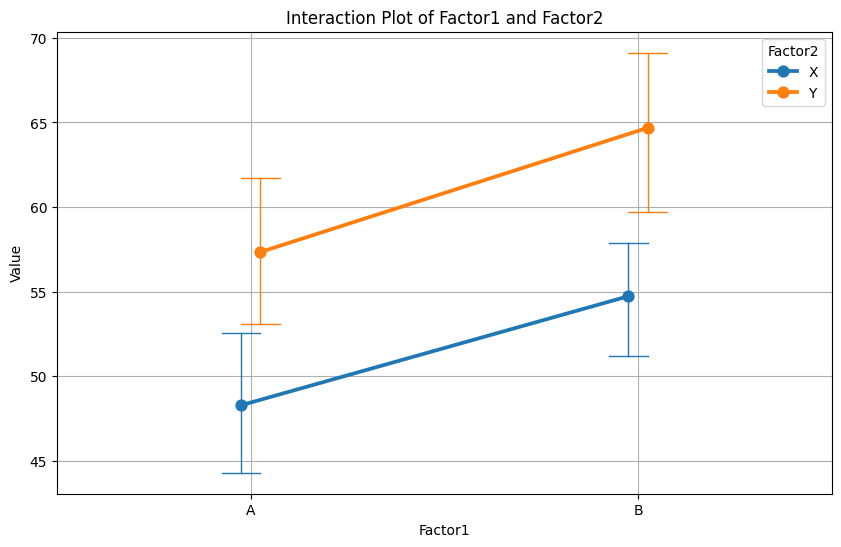

In [34]:
#ANS:20
# Create sample data with two factors
np.random.seed(42)
factor1 = ['A']*40 + ['B']*40
factor2 = ['X']*20 + ['Y']*20 + ['X']*20 + ['Y']*20
values = np.concatenate([
    np.random.normal(loc=50, scale=10, size=20),
    np.random.normal(loc=60, scale=10, size=20),
    np.random.normal(loc=55, scale=10, size=20),
    np.random.normal(loc=65, scale=10, size=20)
])

data = pd.DataFrame({
    'value': values,
    'Factor1': factor1,
    'Factor2': factor2
})

# Perform two-way ANOVA
model = ols('value ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-way ANOVA Results:")
print(anova_table)

# Visualize interaction
plt.figure(figsize=(10, 6))
sns.pointplot(x='Factor1', y='value', hue='Factor2', data=data,
              capsize=0.1, errwidth=1, dodge=True)
plt.title('Interaction Plot of Factor1 and Factor2')
plt.xlabel('Factor1')
plt.ylabel('Value')
plt.legend(title='Factor2')
plt.grid(True)
plt.show()

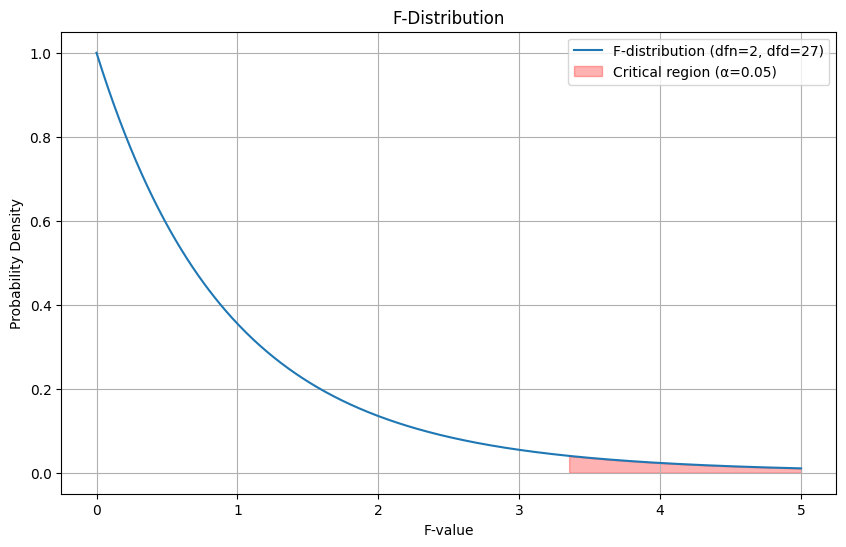


F-distribution in hypothesis testing:
The F-distribution is used in ANOVA to test whether group means are equal.
We compare the calculated F-statistic to the F-distribution with appropriate degrees of freedom.
For α=0.05, dfn=2, dfd=27, the critical value is 3.3541.
If our F-statistic > critical value, we reject the null hypothesis.


In [35]:
#ANS:21
from scipy.stats import f

# Create F-distribution plot
dfn = 2  # degrees of freedom numerator
dfd = 27  # degrees of freedom denominator

x = np.linspace(0, 5, 500)
y = f.pdf(x, dfn, dfd)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (dfn={dfn}, dfd={dfd})')
plt.title('F-Distribution')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.grid(True)

# Add critical region
alpha = 0.05
critical_value = f.ppf(1 - alpha, dfn, dfd)
x_fill = np.linspace(critical_value, 5, 100)
y_fill = f.pdf(x_fill, dfn, dfd)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3,
                 label=f'Critical region (α={alpha})')

plt.legend()
plt.show()

print("\nF-distribution in hypothesis testing:")
print("The F-distribution is used in ANOVA to test whether group means are equal.")
print("We compare the calculated F-statistic to the F-distribution with appropriate degrees of freedom.")
print(f"For α={alpha}, dfn={dfn}, dfd={dfd}, the critical value is {critical_value:.4f}.")
print("If our F-statistic > critical value, we reject the null hypothesis.")

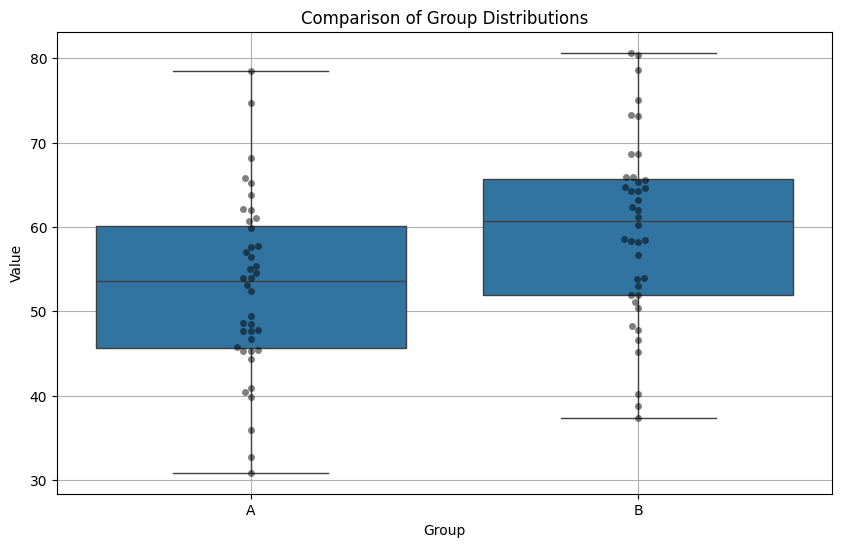


ANOVA Results:
                 sum_sq    df         F    PR(>F)
C(Factor1)   951.078042   1.0  8.268531  0.005198
Residual    8971.858401  78.0       NaN       NaN


In [37]:
#ANS:22
#ANS:22
# Perform ANOVA (same as in Q17)
# Replace 'group' with the actual column name in your data
model = ols('value ~ C(Factor1)', data=data).fit()  # Changed 'group' to 'Factor1'
anova_table = sm.stats.anova_lm(model, typ=2)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Factor1', y='value', data=data) # Changed 'group' to 'Factor1'
sns.swarmplot(x='Factor1', y='value', data=data, color='black', alpha=0.5) # Changed 'group' to 'Factor1'
plt.title('Comparison of Group Distributions')
plt.xlabel('Group')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print("\nANOVA Results:")
print(anova_table)

Two-sample t-test results:
t-statistic: -2.3981
p-value: 0.0197

Reject the null hypothesis: There is a significant difference between the means.


<ipython-input-38-cff4a721a01e>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample1, label='Sample 1', shade=True)
<ipython-input-38-cff4a721a01e>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample2, label='Sample 2', shade=True)


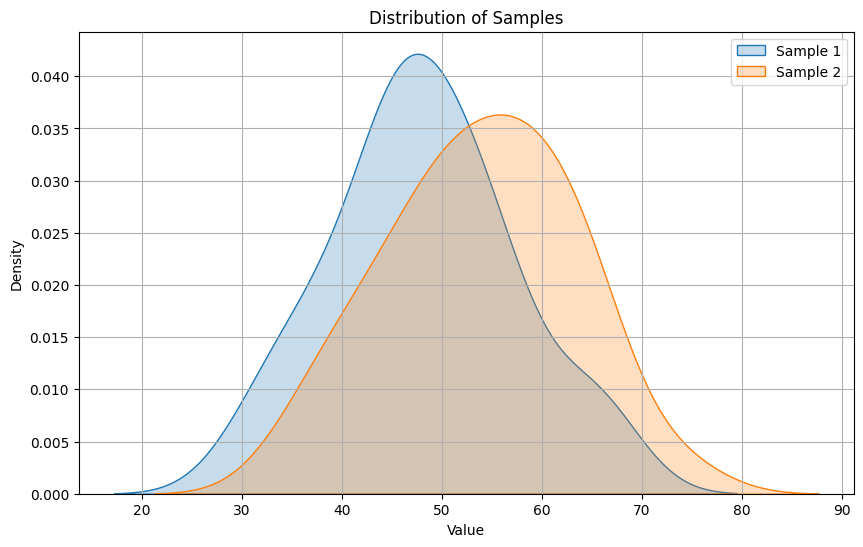

In [38]:
#ANS:23
# Simulate two normal distributions
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)
sample2 = np.random.normal(loc=55, scale=10, size=30)

# Perform t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)

print("Two-sample t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference between the means.")
else:
    print("\nFail to reject the null hypothesis: No significant difference between the means.")

# Plot distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(sample1, label='Sample 1', shade=True)
sns.kdeplot(sample2, label='Sample 2', shade=True)
plt.title('Distribution of Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Chi-square test for variance:
Sample variance: 20.2503
Hypothesized variance: 25
Chi-square statistic: 23.4903
p-value: 0.7536

Fail to reject the null hypothesis: No evidence against the hypothesized variance.


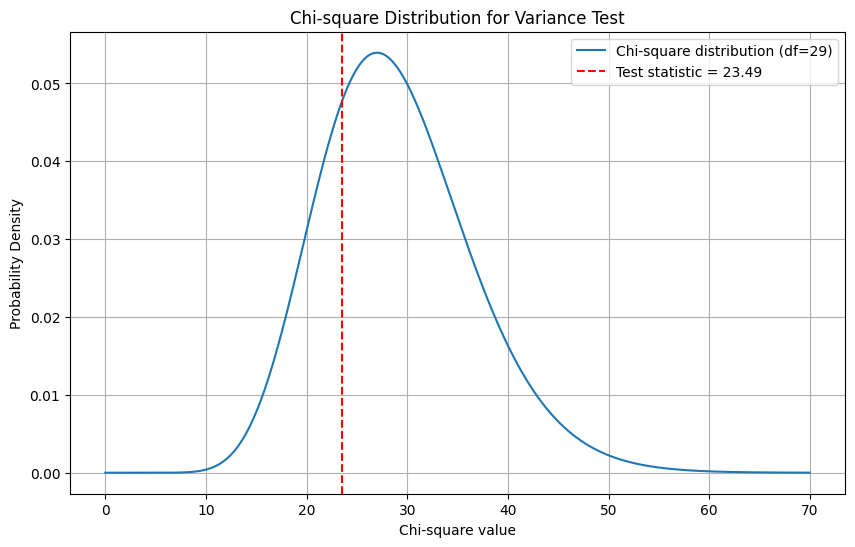

In [39]:
#ANS:24
# Sample data
np.random.seed(42)
sample = np.random.normal(loc=50, scale=5, size=30)
sample_var = np.var(sample, ddof=1)
hypothesized_var = 25  # σ² = 25

# Chi-square test for variance
n = len(sample)
chi_sq_stat = (n - 1) * sample_var / hypothesized_var
p_value = 1 - stats.chi2.cdf(chi_sq_stat, n - 1)

print("Chi-square test for variance:")
print(f"Sample variance: {sample_var:.4f}")
print(f"Hypothesized variance: {hypothesized_var}")
print(f"Chi-square statistic: {chi_sq_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The population variance is not equal to the hypothesized value.")
else:
    print("\nFail to reject the null hypothesis: No evidence against the hypothesized variance.")

# Plot chi-square distribution
df = n - 1
x = np.linspace(0, 70, 500)
y = stats.chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Chi-square distribution (df={df})')
plt.axvline(chi_sq_stat, color='red', linestyle='--',
            label=f'Test statistic = {chi_sq_stat:.2f}')
plt.title('Chi-square Distribution for Variance Test')
plt.xlabel('Chi-square value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Z-test for proportions results:
Proportions: 0.450 vs 0.550
z-statistic: -1.4142
p-value: 0.1573

Fail to reject the null hypothesis: No significant difference between the proportions.


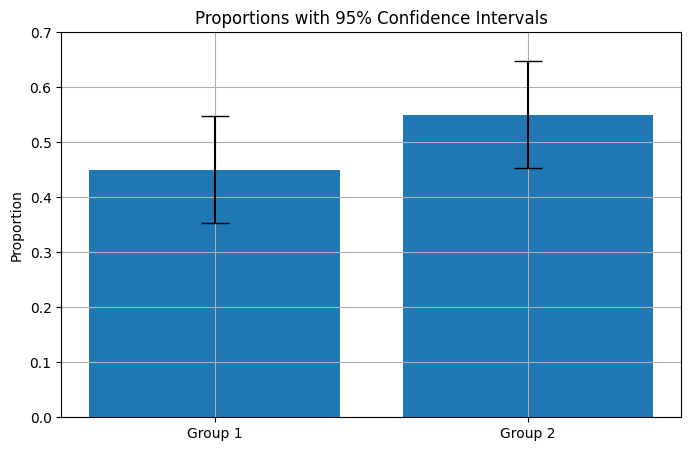

In [40]:
#ANS:25
from statsmodels.stats.proportion import proportions_ztest

# Sample data
successes = np.array([45, 55])  # Number of successes in each group
trials = np.array([100, 100])   # Total trials in each group

# Perform z-test for proportions
z_stat, p_value = proportions_ztest(successes, trials)

print("Z-test for proportions results:")
print(f"Proportions: {successes[0]/trials[0]:.3f} vs {successes[1]/trials[1]:.3f}")
print(f"z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference between the proportions.")
else:
    print("\nFail to reject the null hypothesis: No significant difference between the proportions.")

# Plot proportions
plt.figure(figsize=(8, 5))
plt.bar(['Group 1', 'Group 2'], successes/trials)
plt.errorbar(['Group 1', 'Group 2'], successes/trials,
             yerr=1.96*np.sqrt((successes/trials)*(1-successes/trials)/trials),
             fmt='none', color='black', capsize=10)
plt.title('Proportions with 95% Confidence Intervals')
plt.ylabel('Proportion')
plt.ylim(0, 0.7)
plt.grid(True)
plt.show()

F-test for variances results:
Variances: 20.2503 vs 42.4806
F-statistic: 2.0978
Degrees of freedom: 29, 29
p-value: 0.0505

Fail to reject the null hypothesis: No evidence against equal variances.


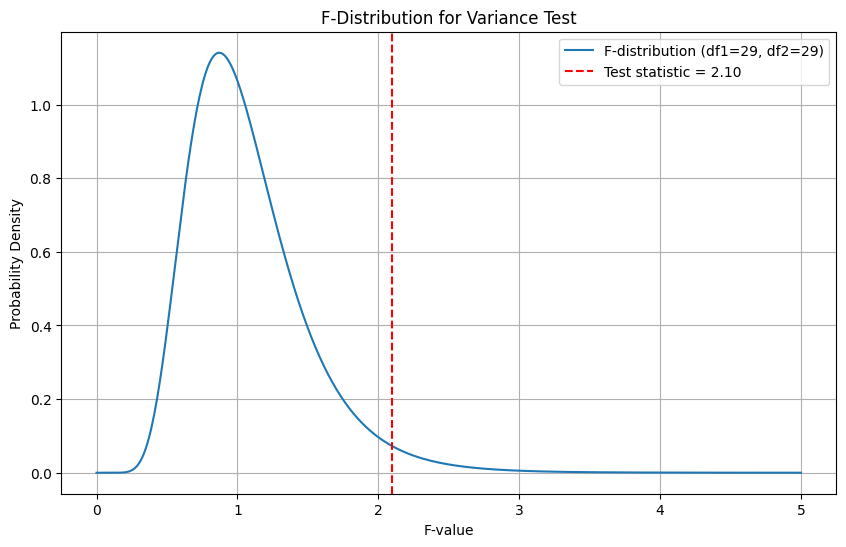

In [41]:
#ANS:26
# Sample data
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=5, size=30)
sample2 = np.random.normal(loc=50, scale=7, size=30)

# Perform F-test
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)
f_stat = var1 / var2 if var1 > var2 else var2 / var1
df1 = len(sample1) - 1
df2 = len(sample2) - 1
p_value = 2 * min(stats.f.cdf(f_stat, df1, df2), 1 - stats.f.cdf(f_stat, df1, df2))

print("F-test for variances results:")
print(f"Variances: {var1:.4f} vs {var2:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"Degrees of freedom: {df1}, {df2}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The variances are not equal.")
else:
    print("\nFail to reject the null hypothesis: No evidence against equal variances.")

# Plot F-distribution
x = np.linspace(0, 5, 500)
y = stats.f.pdf(x, df1, df2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})')
plt.axvline(f_stat, color='red', linestyle='--',
            label=f'Test statistic = {f_stat:.2f}')
plt.title('F-Distribution for Variance Test')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Chi-square goodness of fit test results:
Categories: ['A', 'B', 'C']
Observed counts: [40 62 98]
Expected counts: [ 50.  50. 100.]
Chi-square statistic: 4.9200
p-value: 0.0854

Fail to reject the null hypothesis: The observed distribution matches the expected distribution.


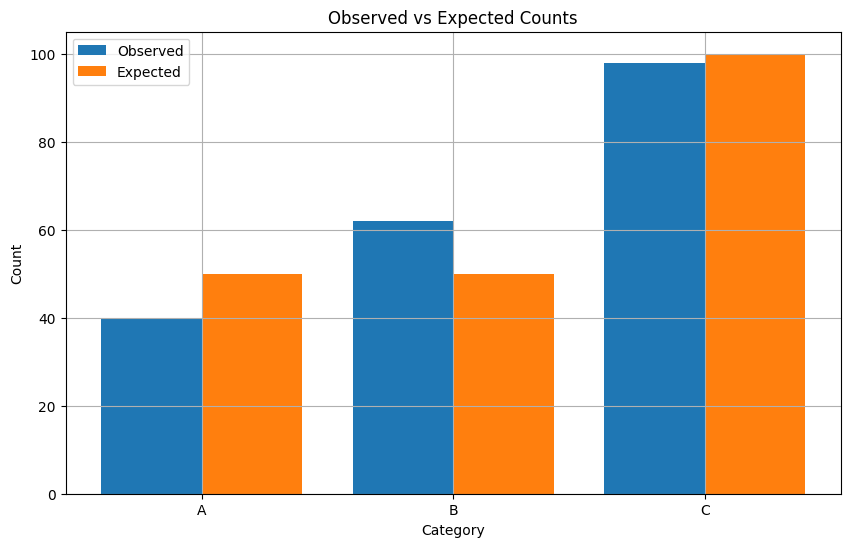

In [42]:
#ANS:27
# Simulate categorical data
np.random.seed(42)
observed = np.random.multinomial(200, [0.2, 0.3, 0.5])
categories = ['A', 'B', 'C']
expected = [0.25, 0.25, 0.5]  # Expected proportions

# Perform chi-square test
chi_sq_stat, p_value = stats.chisquare(observed, f_exp=np.array(expected)*sum(observed))

print("Chi-square goodness of fit test results:")
print("Categories:", categories)
print("Observed counts:", observed)
print("Expected counts:", np.array(expected)*sum(observed))
print(f"Chi-square statistic: {chi_sq_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: The observed distribution does not match the expected distribution.")
else:
    print("\nFail to reject the null hypothesis: The observed distribution matches the expected distribution.")

# Plot observed vs expected
plt.figure(figsize=(10, 6))
x = range(len(categories))
plt.bar(x, observed, width=0.4, label='Observed')
plt.bar([i + 0.4 for i in x], np.array(expected)*sum(observed),
        width=0.4, label='Expected')
plt.xticks([i + 0.2 for i in x], categories)
plt.title('Observed vs Expected Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()